# Analyse exploratoire de données nutritionelles

## 1 -Nettoyage du Dataset
## 2 - Imputer les valeurs manquantes (KNN)

   #### 2 -1 K optimal 
   #### 2 -2 imputer les missing values
   
## 3 - Analyse bivariée

## 4 - ACP

   ####  4 -1 Choix de nombre de compasantes princiale
   ####  4 - 2 Representation des individus sur les CP (NUAGES DE POINTS)
   ####  4 - 3  Representation des variables sur les cp (PLANS DE CORRELATIONS)
   
## 5 - Conclusion   

In [2]:
import pandas as pd
import numpy as np
from math import sqrt
%matplotlib inline
import math
import operator
from numpy.random import randn
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
df=pd.read_csv(r"fr.openfoodfacts.org.products.csv", sep='\t', encoding = 'utf8', low_memory=False)
"""alors on commence avec notre projet, la je dois diminuer la taille des données dans notre dataset , je vais commencer par enlever les variables ou colonnes ou il plus ou egale 70% de données manquantes, je vais enrigistrer la methode ISNULL() dans une nouvelle variable et apres faire un programme qui va suprimer toute les colonnes qui depasse le seuil.
"""
"""la variable DfRemplissage est une serie ou on peut appliquer toutes les methodes appliquer sur les llists
"""
DfRemplissage=df.isnull().sum()
for i in range(162):
    DfRemplissage[i]=(DfRemplissage[i]*100)/320772
    if DfRemplissage[i]>=70:
        df.drop(DfRemplissage.index[i], axis=1, inplace=True )
df.drop(['url','code'], axis=1, inplace=True )
df.drop(['creator','created_t','created_datetime','quantity','last_modified_t'], axis=1, inplace=True )
df.drop(['last_modified_datetime'], axis=1, inplace=True )
df.drop(['countries','countries_tags','countries_fr'], axis=1, inplace=True )
df.drop(['brands_tags','brands','ingredients_that_may_be_from_palm_oil_n','states_fr','states_tags'], axis=1, inplace=True )
df.drop(['additives_tags','states','ingredients_text'], axis=1, inplace=True )
df.drop(['nutrition-score-fr_100g'],axis=1,inplace=True)
df.drop(['serving_size','additives_n','additives','additives_fr','ingredients_from_palm_oil_n'], axis=1, inplace=True )
"""La on a crer une base de donnees avec juste 30% de donnees manquantes """
df.drop(['nutrition-score-uk_100g'], axis=1, inplace=True)
df_sans_mis=df.dropna()

In [3]:
df

,product_name,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g
0,Farine de blé noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Banana Chips Sweetened (Whole),d,2243.0,28.57,28.57,0.0,0.018,64.29,14.29,3.6,3.57,0.00000,0.000000,0.000000,0.0214,0.000,0.00129
2,Peanuts,b,1941.0,17.86,0.00,0.0,0.000,60.71,17.86,7.1,17.86,0.63500,0.250000,0.000000,0.0000,0.071,0.00129
3,Organic Salted Nut Mix,d,2540.0,57.14,5.36,NaN,NaN,17.86,3.57,7.1,17.86,1.22428,0.482000,NaN,NaN,0.143,0.00514
4,Organic Polenta,NaN,1552.0,1.43,NaN,NaN,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN,NaN,NaN
5,Breadshop Honey Gone Nuts Granola,NaN,1933.0,18.27,1.92,NaN,NaN,63.46,11.54,7.7,13.46,NaN,NaN,NaN,NaN,0.038,0.00346
6,Organic Long Grain White Rice,NaN,1490.0,NaN,NaN,NaN,NaN,80.00,NaN,NaN,8.89,NaN,NaN,NaN,0.0027,0.044,NaN
7,Organic Muesli,c,1833.0,18.75,4.69,NaN,NaN,57.81,15.62,9.4,14.06,0.13970,0.055000,NaN,NaN,0.062,0.00422
8,Organic Dark Chocolate Minis,NaN,2406.0,37.50,22.50,NaN,NaN,55.00,42.50,7.5,5.00,NaN,NaN,NaN,NaN,0.050,0.01125
9,Organic Sunflower Oil,NaN,3586.0,100.00,7.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,product_name,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g
0,Farine de blé noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Banana Chips Sweetened (Whole),d,2243.0,28.57,28.57,0.0,0.018,64.29,14.29,3.6,3.57,0.00000,0.000000,0.000000,0.0214,0.000,0.00129
2,Peanuts,b,1941.0,17.86,0.00,0.0,0.000,60.71,17.86,7.1,17.86,0.63500,0.250000,0.000000,0.0000,0.071,0.00129
3,Organic Salted Nut Mix,d,2540.0,57.14,5.36,NaN,NaN,17.86,3.57,7.1,17.86,1.22428,0.482000,NaN,NaN,0.143,0.00514
4,Organic Polenta,NaN,1552.0,1.43,NaN,NaN,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN,NaN,NaN
5,Breadshop Honey Gone Nuts Granola,NaN,1933.0,18.27,1.92,NaN,NaN,63.46,11.54,7.7,13.46,NaN,NaN,NaN,NaN,0.038,0.00346
6,Organic Long Grain White Rice,NaN,1490.0,NaN,NaN,NaN,NaN,80.00,NaN,NaN,8.89,NaN,NaN,NaN,0.0027,0.044,NaN
7,Organic Muesli,c,1833.0,18.75,4.69,NaN,NaN,57.81,15.62,9.4,14.06,0.13970,0.055000,NaN,NaN,0.062,0.00422
8,Organic Dark Chocolate Minis,NaN,2406.0,37.50,22.50,NaN,NaN,55.00,42.50,7.5,5.00,NaN,NaN,NaN,NaN,0.050,0.01125
9,Organic Sunflower Oil,NaN,3586.0,100.00,7.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_sans_mis

,product_name,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g
1,Banana Chips Sweetened (Whole),d,2243.0,28.57,28.570,0.000,0.01800,64.29,14.290,3.600,3.57,0.00000,0.000,0.000000,0.021400,0.0000,0.001290
2,Peanuts,b,1941.0,17.86,0.000,0.000,0.00000,60.71,17.860,7.100,17.86,0.63500,0.250,0.000000,0.000000,0.0710,0.001290
77,Granola Cranberry And Acai,c,1824.0,10.91,0.910,0.000,0.00000,74.55,25.450,5.500,9.09,0.25400,0.100,0.000000,0.000000,0.0360,0.002620
80,"Peanuts, Mixed Nuts",d,2389.0,42.86,7.140,0.000,0.00000,25.00,14.290,7.100,25.00,0.54356,0.214,0.000000,0.000000,0.0710,0.005140
146,Cranberries,c,1255.0,0.00,0.000,0.000,0.00000,83.33,66.670,10.000,0.00,0.00000,0.000,0.000000,0.000000,0.0000,0.000000
147,Turkish Apricots,c,1046.0,0.00,0.000,0.000,0.00000,62.50,52.500,7.500,2.50,0.00000,0.000,0.001125,0.000000,0.0500,0.003600
148,Banana Chips Sweetened,d,2243.0,28.57,28.570,0.000,0.01800,64.29,14.290,3.600,3.57,0.00000,0.000,0.000000,0.021400,0.0000,0.001290
149,Granola Honey Almonds,b,1674.0,14.55,2.730,0.000,0.00000,60.00,21.820,7.300,9.09,0.11430,0.045,0.000000,0.000000,0.0730,0.002620
150,Chili Mango,e,1569.0,2.50,0.000,0.000,0.00000,87.50,65.000,2.500,2.50,1.96850,0.775,0.000750,0.000000,0.1000,0.000900
151,Milk Chocolate Pretzels,e,1883.0,22.50,12.500,0.000,0.01200,70.00,42.500,2.500,5.00,1.01600,0.400,0.000075,0.000000,0.0500,0.001800


,product_name,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g
1,Banana Chips Sweetened (Whole),d,2243.0,28.57,28.570,0.000,0.01800,64.29,14.290,3.600,3.57,0.00000,0.000,0.000000,0.021400,0.0000,0.001290
2,Peanuts,b,1941.0,17.86,0.000,0.000,0.00000,60.71,17.860,7.100,17.86,0.63500,0.250,0.000000,0.000000,0.0710,0.001290
77,Granola Cranberry And Acai,c,1824.0,10.91,0.910,0.000,0.00000,74.55,25.450,5.500,9.09,0.25400,0.100,0.000000,0.000000,0.0360,0.002620
80,"Peanuts, Mixed Nuts",d,2389.0,42.86,7.140,0.000,0.00000,25.00,14.290,7.100,25.00,0.54356,0.214,0.000000,0.000000,0.0710,0.005140
146,Cranberries,c,1255.0,0.00,0.000,0.000,0.00000,83.33,66.670,10.000,0.00,0.00000,0.000,0.000000,0.000000,0.0000,0.000000
147,Turkish Apricots,c,1046.0,0.00,0.000,0.000,0.00000,62.50,52.500,7.500,2.50,0.00000,0.000,0.001125,0.000000,0.0500,0.003600
148,Banana Chips Sweetened,d,2243.0,28.57,28.570,0.000,0.01800,64.29,14.290,3.600,3.57,0.00000,0.000,0.000000,0.021400,0.0000,0.001290
149,Granola Honey Almonds,b,1674.0,14.55,2.730,0.000,0.00000,60.00,21.820,7.300,9.09,0.11430,0.045,0.000000,0.000000,0.0730,0.002620
150,Chili Mango,e,1569.0,2.50,0.000,0.000,0.00000,87.50,65.000,2.500,2.50,1.96850,0.775,0.000750,0.000000,0.1000,0.000900
151,Milk Chocolate Pretzels,e,1883.0,22.50,12.500,0.000,0.01200,70.00,42.500,2.500,5.00,1.01600,0.400,0.000075,0.000000,0.0500,0.001800


In [15]:

# Create feature matrix with quantitatifs feature
X = df_sans_mis.values[:,2:-1]

y= df_sans_mis.values[:,-1]



sample = np.random.randint(126287, size=5000)
data = X[sample]
target = y[sample]






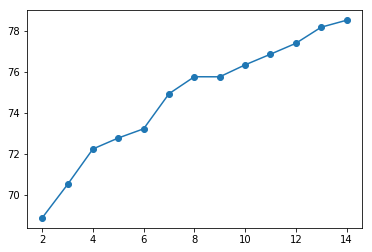

In [16]:
"""choix de K"""

from sklearn import neighbors
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2)
errors = []
for k in range(2,15):
    knn= neighbors.KNeighborsRegressor(k)
    errors.append(100*(1 - knn.fit(x_train, y_train).score(x_test, y_test)))
plt.plot(range(2,15), errors, 'o-')
plt.show()

In [17]:
"""alors k egale 2"""

'alors k egale 2'

In [18]:
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(data, target)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=2, p=2,
          weights='uniform')

In [19]:
test=np.array(data[15])
test1=test.reshape(1,-1)
knn.predict(test1)

array([0.00214], dtype=object)

In [20]:
data_not_mis=df.dropna()
data23=df.drop(data_not_mis.index, axis=0)
"""on laisse dans data 23 que les individues avec les missing values afin de les imputees """

'on laisse dans data 23 que les individues avec les missing values afin de les imputees '

In [21]:
data_with_nan=data23.sample(n=5000)

In [22]:
data_with_nan

,product_name,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g
251607,la violette,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183694,Strudel de manzana,c,945.0,10.00,5.000,NaN,NaN,29.50,10.00,NaN,3.20,0.50000,0.196850,NaN,NaN,NaN,NaN
249618,DESTINATION CACAO,NaN,1142.0,11.00,NaN,NaN,NaN,17.00,NaN,NaN,24.00,NaN,NaN,NaN,NaN,NaN,NaN
247640,"Cabillaud pané, qualité 100% filet",d,736.0,NaN,6.700,NaN,NaN,NaN,16.00,0.70,13.00,0.55000,0.216535,NaN,NaN,NaN,NaN
248251,Gouda Fruité,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26954,"Cran-Energy, Cranberry Energy Juice Drink, Pom...",NaN,54.0,0.00,NaN,NaN,NaN,3.41,3.41,NaN,0.00,0.04826,0.019000,NaN,0.0227,NaN,NaN
178938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96649,Thin Sliced Ham Honey Ham,d,552.0,3.77,1.890,0.0,0.057,5.66,5.66,NaN,18.87,3.16230,1.245000,NaN,NaN,NaN,0.00272
16350,Black Tea,NaN,0.0,0.00,NaN,NaN,NaN,0.00,0.00,NaN,0.00,0.00000,0.000000,NaN,NaN,NaN,NaN
301634,Le Cravattine N.60,a,1521.0,1.50,0.500,NaN,NaN,72.00,2.50,NaN,13.00,0.01000,0.003937,NaN,NaN,NaN,NaN


In [23]:

data_product=data_with_nan['product_name']
data_nutrition=data_with_nan['nutrition_grade_fr']
data_with_nan.drop(['product_name','nutrition_grade_fr'],axis=1,inplace=True)

In [24]:
len(data_with_nan)

5000

In [25]:
data_with_nan

,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g
251607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183694,945.0,10.00,5.000,NaN,NaN,29.50,10.00,NaN,3.20,0.50000,0.196850,NaN,NaN,NaN,NaN
249618,1142.0,11.00,NaN,NaN,NaN,17.00,NaN,NaN,24.00,NaN,NaN,NaN,NaN,NaN,NaN
247640,736.0,NaN,6.700,NaN,NaN,NaN,16.00,0.70,13.00,0.55000,0.216535,NaN,NaN,NaN,NaN
248251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26954,54.0,0.00,NaN,NaN,NaN,3.41,3.41,NaN,0.00,0.04826,0.019000,NaN,0.0227,NaN,NaN
178938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96649,552.0,3.77,1.890,0.0,0.057,5.66,5.66,NaN,18.87,3.16230,1.245000,NaN,NaN,NaN,0.00272
16350,0.0,0.00,NaN,NaN,NaN,0.00,0.00,NaN,0.00,0.00000,0.000000,NaN,NaN,NaN,NaN
301634,1521.0,1.50,0.500,NaN,NaN,72.00,2.50,NaN,13.00,0.01000,0.003937,NaN,NaN,NaN,NaN


In [26]:

data_product_sans=df_sans_mis['product_name']
data_nutrition_sans=df_sans_mis['nutrition_grade_fr']
df_sans_mis.drop(['product_name','nutrition_grade_fr'], axis=1, inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [27]:
df_sans_mis

,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g
1,2243.0,28.57,28.570,0.000,0.01800,64.29,14.290,3.600,3.57,0.00000,0.000,0.000000,0.021400,0.0000,0.001290
2,1941.0,17.86,0.000,0.000,0.00000,60.71,17.860,7.100,17.86,0.63500,0.250,0.000000,0.000000,0.0710,0.001290
77,1824.0,10.91,0.910,0.000,0.00000,74.55,25.450,5.500,9.09,0.25400,0.100,0.000000,0.000000,0.0360,0.002620
80,2389.0,42.86,7.140,0.000,0.00000,25.00,14.290,7.100,25.00,0.54356,0.214,0.000000,0.000000,0.0710,0.005140
146,1255.0,0.00,0.000,0.000,0.00000,83.33,66.670,10.000,0.00,0.00000,0.000,0.000000,0.000000,0.0000,0.000000
147,1046.0,0.00,0.000,0.000,0.00000,62.50,52.500,7.500,2.50,0.00000,0.000,0.001125,0.000000,0.0500,0.003600
148,2243.0,28.57,28.570,0.000,0.01800,64.29,14.290,3.600,3.57,0.00000,0.000,0.000000,0.021400,0.0000,0.001290
149,1674.0,14.55,2.730,0.000,0.00000,60.00,21.820,7.300,9.09,0.11430,0.045,0.000000,0.000000,0.0730,0.002620
150,1569.0,2.50,0.000,0.000,0.00000,87.50,65.000,2.500,2.50,1.96850,0.775,0.000750,0.000000,0.1000,0.000900
151,1883.0,22.50,12.500,0.000,0.01200,70.00,42.500,2.500,5.00,1.01600,0.400,0.000075,0.000000,0.0500,0.001800


In [28]:

j=1
while  j<=15:
    asdk=df_sans_mis.drop([df_sans_mis.columns[-j]],axis=1)
    X = asdk.values
    y= df_sans_mis.values[:,-j]
    dknN11=list(data_with_nan.values[:,-j])
    sample = np.random.randint(126287, size=5000)
    data = X[sample]
    target = y[sample]
    knn = KNeighborsRegressor(n_neighbors=2)
    knn.fit(data, target)
    for i in range(len(data_with_nan)):
        if data_with_nan[data_with_nan.columns[-j]].isnull().iloc[i]==True:
            dat=data_with_nan[data_with_nan.columns.drop(data_with_nan.columns[-j])].iloc[i].fillna(0)
            test=dat.values
            test1=test.reshape(1,-1)
            a=knn.predict(test1)
            dknN11[i] = float(a)
    data_with_nan[data_with_nan.columns[-j]]=dknN11 
    j=j+1

In [29]:
data_with_nan['nutrition_grade_fr']=data_with_nan['fat_100g']+0

In [30]:
data_with_nan['nutrition_grade_fr']=data_nutrition

In [32]:
df_sans_mis['nutrition_grade_fr']=df_sans_mis['fat_100g']+0

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
df_sans_mis['nutrition_grade_fr']=data_nutrition_sans

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
data_with_nan.index=data_product.values

In [35]:
data_with_nan

,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition_grade_fr
la violette,1014.5,0.000,0.000,0.000,0.0000,50.000,0.000,0.00,0.00,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,NaN
Strudel de manzana,945.0,10.000,5.000,0.000,0.0400,29.500,10.000,1.95,3.20,0.50000,0.196850,0.000095,0.002255,0.1055,0.001680,c
DESTINATION CACAO,1142.0,11.000,2.650,0.295,0.0735,17.000,1.480,0.90,24.00,1.54686,0.965500,0.000020,0.000600,0.0590,0.002245,NaN
"Cabillaud pané, qualité 100% filet",736.0,4.955,6.700,0.000,0.0240,30.775,16.000,0.70,13.00,0.55000,0.216535,0.000099,0.006350,0.2055,0.000945,d
Gouda Fruité,1014.5,0.000,0.000,0.000,0.0000,50.000,0.000,0.00,0.00,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,NaN
"Cran-Energy, Cranberry Energy Juice Drink, Pomegranate",54.0,0.000,0.000,0.000,0.0000,3.410,3.410,0.45,0.00,0.04826,0.019000,0.000164,0.022700,0.0210,0.000075,NaN
NaN,1014.5,0.000,0.000,0.000,0.0000,50.000,0.000,0.00,0.00,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,NaN
Thin Sliced Ham Honey Ham,552.0,3.770,1.890,0.000,0.0570,5.660,5.660,1.10,18.87,3.16230,1.245000,0.000232,0.002850,0.0090,0.002720,d
Black Tea,0.0,0.000,0.000,0.000,0.0000,0.000,0.000,0.00,0.00,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000,NaN
Le Cravattine N.60,1521.0,1.500,0.500,0.000,0.0000,72.000,2.500,4.25,13.00,0.01000,0.003937,0.000027,0.000000,0.0520,0.002355,a


In [36]:
df_sans_mis.index=data_product_sans.values

In [37]:
"""la maintenant je vais utiliser le model de classification de knn pour imputer les nutritions grades pourdata_with_nan """

'la maintenant je vais utiliser le model de classification de knn pour imputer les nutritions grades pourdata_with_nan '

In [38]:
a = df_sans_mis.values[:,:-1]

b= df_sans_mis.values[:,-1]




data1 = a
target1 = b

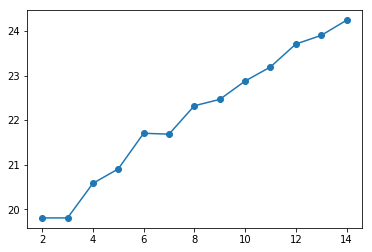

In [39]:

"""choix de K"""

from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
a_train, a_test, b_train, b_test = train_test_split(data1, target1, test_size=0.2)
errors = []
for k in range(2,15):
    cl= neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - cl.fit(a_train, b_train).score(a_test, b_test)))
plt.plot(range(2,15), errors, 'o-')
plt.show()

In [40]:
"""k = 3"""

'k = 3'

In [41]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(data1, target1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [42]:
test22=data_with_nan.values[:,:-1][20]
test11=test22.reshape(1,-1)
clf.predict(test11)

array(['a'], dtype=object)

In [43]:
nn11=data_with_nan["nutrition_grade_fr"].values
nn11=list(nn11)


In [44]:
for d in range(len(data_with_nan)):
    if data_with_nan[data_with_nan.columns[-1]].isnull().iloc[d]==True:
        testXX=data_with_nan.values[:,:-1][d]
        testYY=testXX.reshape(1,-1)
        f=clf.predict(testYY)
        cc=list(f)
        
        nn11[d]=cc[0]


In [46]:
 len(nn11)
    

5000

In [47]:
data_with_nan["nutrition_grade_fr"]=nn11

In [48]:
Datafinal=pd.concat([df_sans_mis, data_with_nan])

In [49]:
df_sans_mis

,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition_grade_fr
Banana Chips Sweetened (Whole),2243.0,28.57,28.570,0.000,0.01800,64.29,14.290,3.600,3.57,0.00000,0.000,0.000000,0.021400,0.0000,0.001290,d
Peanuts,1941.0,17.86,0.000,0.000,0.00000,60.71,17.860,7.100,17.86,0.63500,0.250,0.000000,0.000000,0.0710,0.001290,b
Granola Cranberry And Acai,1824.0,10.91,0.910,0.000,0.00000,74.55,25.450,5.500,9.09,0.25400,0.100,0.000000,0.000000,0.0360,0.002620,c
"Peanuts, Mixed Nuts",2389.0,42.86,7.140,0.000,0.00000,25.00,14.290,7.100,25.00,0.54356,0.214,0.000000,0.000000,0.0710,0.005140,d
Cranberries,1255.0,0.00,0.000,0.000,0.00000,83.33,66.670,10.000,0.00,0.00000,0.000,0.000000,0.000000,0.0000,0.000000,c
Turkish Apricots,1046.0,0.00,0.000,0.000,0.00000,62.50,52.500,7.500,2.50,0.00000,0.000,0.001125,0.000000,0.0500,0.003600,c
Banana Chips Sweetened,2243.0,28.57,28.570,0.000,0.01800,64.29,14.290,3.600,3.57,0.00000,0.000,0.000000,0.021400,0.0000,0.001290,d
Granola Honey Almonds,1674.0,14.55,2.730,0.000,0.00000,60.00,21.820,7.300,9.09,0.11430,0.045,0.000000,0.000000,0.0730,0.002620,b
Chili Mango,1569.0,2.50,0.000,0.000,0.00000,87.50,65.000,2.500,2.50,1.96850,0.775,0.000750,0.000000,0.1000,0.000900,e
Milk Chocolate Pretzels,1883.0,22.50,12.500,0.000,0.01200,70.00,42.500,2.500,5.00,1.01600,0.400,0.000075,0.000000,0.0500,0.001800,e


In [50]:
Datafinal.index=range(131287)

In [51]:
Datafinal2=Datafinal.sort_values(by = 'nutrition_grade_fr', ascending = True)

In [52]:
Datafinal2

,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition_grade_fr
26261,1628.0,6.94,1.39,0.0,0.000,63.89,0.00,11.1,16.67,0.00000,0.000,0.000000,0.0000,0.056,0.00500,a
115880,138.0,0.00,0.00,0.0,0.002,2.50,2.50,0.0,5.42,0.12700,0.050,0.000062,0.0000,0.167,0.00000,a
115882,669.0,2.00,1.00,0.0,0.020,17.00,14.00,3.0,20.00,0.15240,0.060,0.000030,0.0012,0.200,0.00000,a
115883,669.0,2.00,1.00,0.0,0.005,18.00,14.00,3.0,20.00,0.19050,0.075,0.000000,0.0060,0.150,0.00000,a
115884,669.0,2.00,1.00,0.0,0.020,17.00,14.00,3.0,20.00,0.15240,0.060,0.000030,0.0012,0.200,0.00000,a
115885,669.0,2.00,1.00,0.0,0.020,17.00,14.00,3.0,20.00,0.15240,0.060,0.000030,0.0012,0.200,0.00036,a
27374,1004.0,3.00,0.00,0.0,0.000,46.00,6.00,6.0,10.00,1.21920,0.480,0.000000,0.0000,0.080,0.00216,a
115888,1448.0,7.69,0.00,0.0,0.000,69.23,0.00,7.7,7.69,1.07442,0.423,0.000000,0.0000,0.000,0.00554,a
115894,297.0,0.00,0.00,0.0,0.000,17.86,10.71,3.6,3.57,0.00000,0.000,0.000107,0.0145,0.000,0.00000,a
115895,297.0,0.00,0.00,0.0,0.000,17.86,14.29,3.6,0.00,0.01778,0.007,0.000054,0.0257,0.000,0.00036,a


In [53]:
"""analyse univariée """

'analyse univariée '

In [54]:
"""je vais commencer ma premiere analyse par une analyse univariée entre les grande famille de nutrition glucides,lipides et proteines, je commence par une analyse entre chaques variable qui constitue cuaque famille et aussi je vais faire une analyse par rapport a la nutrition grade """ 

'je vais commencer ma premiere analyse par une analyse univariée entre les grande famille de nutrition glucides,lipides et proteines, je commence par une analyse entre chaques variable qui constitue cuaque famille et aussi je vais faire une analyse par rapport a la nutrition grade '

Text(0.5, 0.98, 'nutrition_grade_fr')

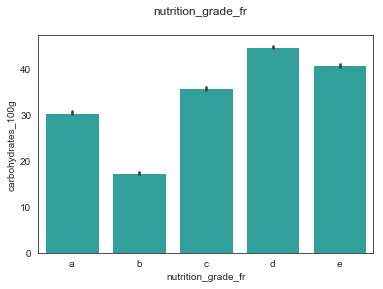

In [55]:


import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")

%matplotlib inline
g_eig = seaborn.barplot(x = "nutrition_grade_fr", 
                y = "carbohydrates_100g",
                palette = ["lightseagreen"],
                data = Datafinal2)
g_eig.set(ylabel = "carbohydrates_100g")
g_eig.figure.suptitle("nutrition_grade_fr")

Text(0.5, 0.98, 'nutrition_grade_fr')

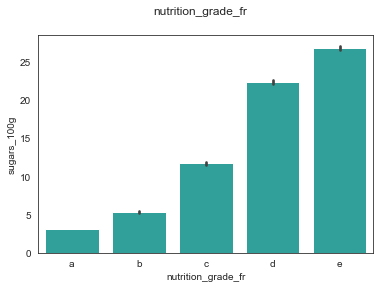

In [56]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")

%matplotlib inline
g_eig = seaborn.barplot(x = "nutrition_grade_fr", 
                y = "sugars_100g",
                palette = ["lightseagreen"],
                data = Datafinal2)
g_eig.set(ylabel = "sugars_100g")
g_eig.figure.suptitle("nutrition_grade_fr")

Text(0.5, 0.98, 'nutrition_grade_fr')

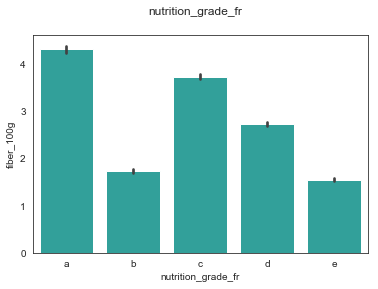

In [57]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")

%matplotlib inline
g_eig = seaborn.barplot(x = "nutrition_grade_fr", 
                y = "fiber_100g",
                palette = ["lightseagreen"],
                data = Datafinal2)
g_eig.set(ylabel = "fiber_100g")
g_eig.figure.suptitle("nutrition_grade_fr")

Text(0.5, 0.98, 'nutrition_grade_fr')

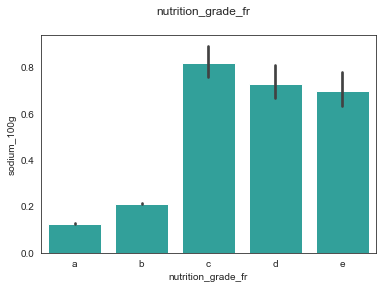

In [58]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")



import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")

%matplotlib inline
g2_eig = seaborn.barplot(x = "nutrition_grade_fr", 
                y = "sodium_100g",
                palette = ["lightseagreen"],
                data = Datafinal2)
g2_eig.set(ylabel = "sodium_100g")
g2_eig.figure.suptitle("nutrition_grade_fr")

Text(0.5, 0.98, 'nutrition_grade_fr')

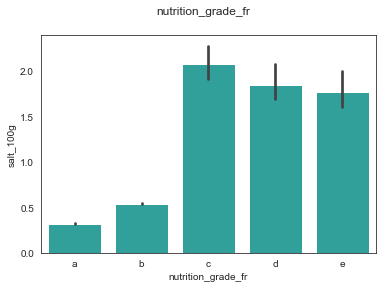

In [59]:




import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")

%matplotlib inline
g2_eig = seaborn.barplot(x = "nutrition_grade_fr", 
                y = "salt_100g",
                palette = ["lightseagreen"],
                data = Datafinal2)
g2_eig.set(ylabel = "salt_100g")
g2_eig.figure.suptitle("nutrition_grade_fr")


Text(0.5, 0.98, 'nutrition_grade_fr')

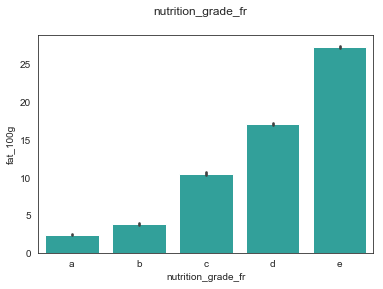

In [60]:
"""lipides"""


import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")

%matplotlib inline
g23_eig = seaborn.barplot(x = "nutrition_grade_fr", 
                y = "fat_100g",
                palette = ["lightseagreen"],
                data = Datafinal2)
g23_eig.set(ylabel = "fat_100g")
g23_eig.figure.suptitle("nutrition_grade_fr")


Text(0.5, 0.98, 'nutrition_grade_fr')

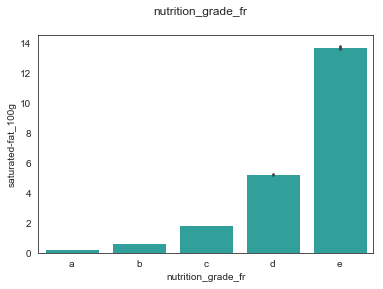

In [61]:

import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")

%matplotlib inline
g23_eig = seaborn.barplot(x = "nutrition_grade_fr", 
                y = "saturated-fat_100g",
                palette = ["lightseagreen"],
                data = Datafinal2)
g23_eig.set(ylabel = "saturated-fat_100g")
g23_eig.figure.suptitle("nutrition_grade_fr")

Text(0.5, 0.98, 'nutrition_grade_fr')

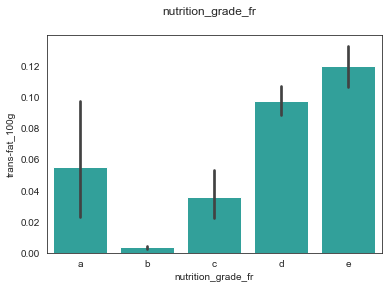

In [62]:


import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")

%matplotlib inline
g23_eig = seaborn.barplot(x = "nutrition_grade_fr", 
                y = "trans-fat_100g",
                palette = ["lightseagreen"],
                data = Datafinal2)
g23_eig.set(ylabel = "trans-fat_100g")
g23_eig.figure.suptitle("nutrition_grade_fr")

Text(0.5, 0.98, 'nutrition_grade_fr')

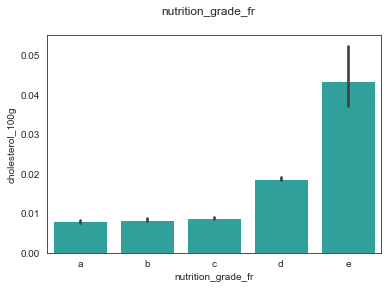

In [63]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")

%matplotlib inline
g23_eig = seaborn.barplot(x = "nutrition_grade_fr", 
                y = "cholesterol_100g",
                palette = ["lightseagreen"],
                data = Datafinal2)
g23_eig.set(ylabel = "cholesterol_100g")
g23_eig.figure.suptitle("nutrition_grade_fr")

Text(0.5, 0.98, 'nutrition_grade_fr')

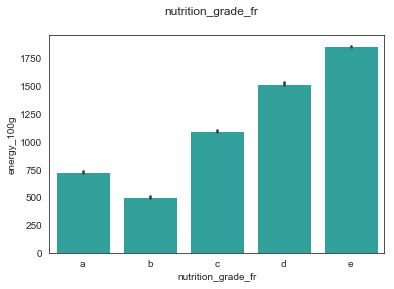

In [64]:

import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")

%matplotlib inline
g23_eig = seaborn.barplot(x = "nutrition_grade_fr", 
                y = "energy_100g",
                palette = ["lightseagreen"],
                data = Datafinal2)
g23_eig.set(ylabel = "energy_100g")
g23_eig.figure.suptitle("nutrition_grade_fr")

In [66]:
Datafinal2

,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition_grade_fr
26261,1628.0,6.94,1.39,0.0,0.000,63.89,0.00,11.1,16.67,0.00000,0.000,0.000000,0.0000,0.056,0.00500,a
115880,138.0,0.00,0.00,0.0,0.002,2.50,2.50,0.0,5.42,0.12700,0.050,0.000062,0.0000,0.167,0.00000,a
115882,669.0,2.00,1.00,0.0,0.020,17.00,14.00,3.0,20.00,0.15240,0.060,0.000030,0.0012,0.200,0.00000,a
115883,669.0,2.00,1.00,0.0,0.005,18.00,14.00,3.0,20.00,0.19050,0.075,0.000000,0.0060,0.150,0.00000,a
115884,669.0,2.00,1.00,0.0,0.020,17.00,14.00,3.0,20.00,0.15240,0.060,0.000030,0.0012,0.200,0.00000,a
115885,669.0,2.00,1.00,0.0,0.020,17.00,14.00,3.0,20.00,0.15240,0.060,0.000030,0.0012,0.200,0.00036,a
27374,1004.0,3.00,0.00,0.0,0.000,46.00,6.00,6.0,10.00,1.21920,0.480,0.000000,0.0000,0.080,0.00216,a
115888,1448.0,7.69,0.00,0.0,0.000,69.23,0.00,7.7,7.69,1.07442,0.423,0.000000,0.0000,0.000,0.00554,a
115894,297.0,0.00,0.00,0.0,0.000,17.86,10.71,3.6,3.57,0.00000,0.000,0.000107,0.0145,0.000,0.00000,a
115895,297.0,0.00,0.00,0.0,0.000,17.86,14.29,3.6,0.00,0.01778,0.007,0.000054,0.0257,0.000,0.00036,a


In [ ]:
DatafinalS.drop(["sodium_100g"],axis=1,inplace=True)

In [68]:

DatafinalS=Datafinal2.sample(n=5000)


X=DatafinalS[DatafinalS.columns[:-1]]


#standardisation
from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(X)
print(Z)

[[ 1.77628134  2.35332545  1.42715467 ... -0.17451838 -0.02619108
   0.30017723]
 [ 0.09666434  0.34192816  0.76354244 ... -0.17451838 -0.0148423
  -0.57622157]
 [ 0.9060066   0.7579913   1.53162578 ... -0.17451838 -0.04108636
   0.65141876]
 ...
 [-0.29674753  0.01328932 -0.42978245 ...  0.0893073  -0.0765513
  -0.16700812]
 [-0.87295683 -0.61208166 -0.41653963 ... -0.17451838 -0.0765513
  -0.57622157]
 [-0.8570614  -0.58528005 -0.28852574 ... -0.17451838 -0.0765513
  -0.57622157]]


In [69]:
#dimension
print(X.shape) # 
#nombre d'observations
n = X.shape[0]
#nombre de variables
p = X.shape[1]
#affichage des données
X

(5000, 15)


,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g
102858,2540.0,50.00,14.29,0.0,0.000,39.29,25.00,3.60,10.71,0.00000,0.000,0.000000,0.0000,0.071,0.00257
66669,1272.0,18.48,9.78,0.0,0.038,29.35,20.65,2.20,6.52,0.57912,0.228,0.000098,0.0000,0.087,0.00000
60254,1883.0,25.00,15.00,0.0,0.000,65.00,52.50,7.50,2.50,0.15748,0.062,0.000000,0.0000,0.050,0.00360
8940,904.0,9.60,2.80,2.0,0.008,26.40,0.80,1.60,8.80,1.66624,0.656,0.000072,0.0038,0.120,0.00216
108376,1255.0,0.00,0.00,0.0,0.000,72.50,47.50,0.00,5.00,0.06350,0.025,0.000000,0.0000,0.000,0.00000
101303,787.0,12.94,3.53,0.0,0.112,2.35,1.18,1.20,16.47,1.79324,0.706,0.000247,0.0028,0.071,0.00169
84449,1644.0,32.14,19.64,0.0,0.107,0.00,0.00,0.00,25.00,1.63322,0.643,0.000321,0.0000,0.714,0.00000
1547,1393.0,33.33,23.33,0.0,0.133,6.67,0.00,0.00,0.00,0.08382,0.033,0.000400,0.0000,0.133,0.00000
100651,1552.0,3.57,1.43,0.0,0.007,70.00,7.14,2.90,14.29,1.81356,0.714,0.000000,0.0000,0.143,0.00103
41891,2142.0,27.91,16.28,0.0,0.023,60.47,51.16,2.30,6.98,0.88646,0.349,0.000000,0.0000,0.140,0.00000


In [70]:
#écart-type
print(np.std(Z,axis=0,ddof=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [71]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca = PCA()
pca.fit(Z)
"""a verifier et a enlever sij'ai tort pf n'existe pas"""

"a verifier et a enlever sij'ai tort pf n'existe pas"

In [72]:
print(pca.explained_variance_)


[2.82579775e+00 2.21283711e+00 1.98039166e+00 1.52270054e+00
 1.16057730e+00 1.00242624e+00 9.93369735e-01 8.52263968e-01
 7.88683046e-01 6.17818901e-01 4.58353228e-01 3.08103944e-01
 2.62167644e-01 1.75004276e-02 9.10057555e-06]


In [73]:
print(pca.explained_variance_ratio_*100)

[1.88348839e+01 1.47492970e+01 1.31999705e+01 1.01493067e+01
 7.73563458e+00 6.68150506e+00 6.62114041e+00 5.68062343e+00
 5.25683540e+00 4.11796891e+00 3.05507705e+00 2.05361548e+00
 1.74743474e+00 1.16646183e-01 6.06583696e-05]


In [79]:
eigval = ((5000-1)/5000)*pca.explained_variance_

In [80]:
eigval

array([2.82523259e+00, 2.21239455e+00, 1.97999558e+00, 1.52239600e+00,
       1.16034519e+00, 1.00222576e+00, 9.93171061e-01, 8.52093515e-01,
       7.88525310e-01, 6.17695337e-01, 4.58261557e-01, 3.08042323e-01,
       2.62115211e-01, 1.74969275e-02, 9.09875544e-06])

In [81]:
pca.explained_variance_

array([2.82579775e+00, 2.21283711e+00, 1.98039166e+00, 1.52270054e+00,
       1.16057730e+00, 1.00242624e+00, 9.93369735e-01, 8.52263968e-01,
       7.88683046e-01, 6.17818901e-01, 4.58353228e-01, 3.08103944e-01,
       2.62167644e-01, 1.75004276e-02, 9.10057555e-06])

In [76]:
eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(15)], 
        "Valeur propre" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)
eig

,Dimension,Valeur propre,% variance expliquée,% cum. var. expliquée
0,Dim1,2.825798,19.0,19.0
1,Dim2,2.212837,15.0,34.0
2,Dim3,1.980392,13.0,47.0
3,Dim4,1.522701,10.0,57.0
4,Dim5,1.160577,8.0,65.0
5,Dim6,1.002426,7.0,71.0
6,Dim7,0.993370,7.0,78.0
7,Dim8,0.852264,6.0,84.0
8,Dim9,0.788683,5.0,89.0
9,Dim10,0.617819,4.0,93.0


Text(0.5, 0.98, 'Variance expliquée par dimension')

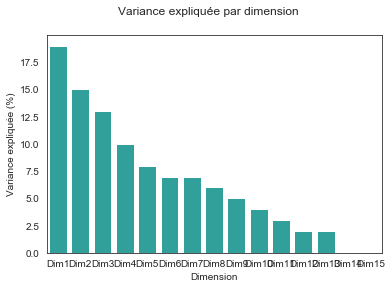

In [82]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")

%matplotlib inline
g_eig = seaborn.barplot(x = "Dimension", 
                y = "% variance expliquée",
                palette = ["lightseagreen"],
                data = eig)
g_eig.set(ylabel = "Variance expliquée (%)")
g_eig.figure.suptitle("Variance expliquée par dimension")


<function matplotlib.pyplot.show(*args, **kw)>

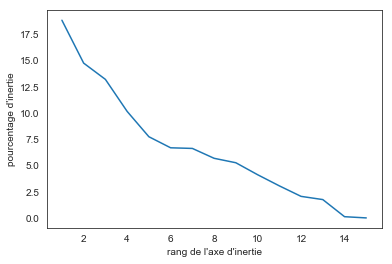

In [83]:
scree = pca.explained_variance_ratio_*100

plt.plot(np.arange(1,p+1),scree)
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.show

In [84]:
X_pca = pca.transform(Z)

In [229]:
X_pca = pca.transform(Z)
# Transformation en DataFrame pandas
X_pca_df = pd.DataFrame({
    "Dim1" : X_pca[:,0], 
    "Dim2" : X_pca[:,1], 
    "Dim3" : X_pca[:,2], 
    "Dim4" : X_pca[:,3],
    "Dim5" : X_pca[:,4],
    "nutrition_grade_fr" : DatafinalS["nutrition_grade_fr"]
})

# Résultat (premières lignes)
X_pca_df.head()

,Dim1,Dim2,Dim3,Dim4,Dim5,nutrition_grade_fr
32004,3.022136,0.156489,-0.163853,-0.590922,-0.020082,b
10735,0.461760,0.571807,-0.574570,-0.744557,0.250873,c
68141,2.278440,-1.639621,0.288117,-1.042520,0.192747,e
5044,-0.634235,0.325935,-0.017806,0.405355,-0.304014,d
84671,-0.363574,-1.910001,-0.113877,-1.333826,0.233013,d


Text(0.5, 0.98, 'Premier plan factoriel')

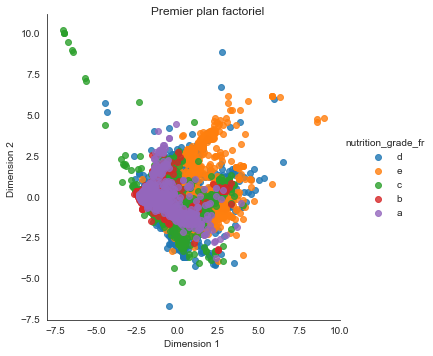

In [159]:
g_pca1 = seaborn.lmplot("Dim1", "Dim2", hue = "nutrition_grade_fr" , data = X_pca_df, fit_reg = False)
g_pca1.set(xlabel = "Dimension 1 ", ylabel = "Dimension 2 ")
g_pca1.fig.suptitle("Premier plan factoriel")

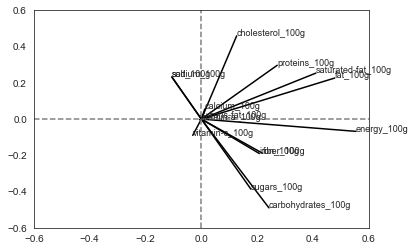

In [120]:
pcs = pca.components_

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    if 
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, DatafinalS.columns[i], fontsize='9')

# Afficher une ligne horizontale y=0
plt.plot([-0.6, 0.6], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.6, 0.6], color='grey', ls='--')

plt.xlim([-0.6, 0.6])
plt.ylim([-0.6, 0.6])
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()

Text(0.5, 0.98, 'Premier plan factorie2')

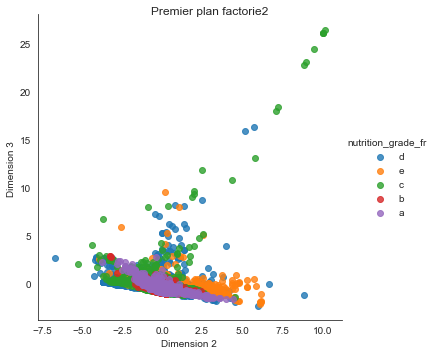

In [150]:
g_pca1 = seaborn.lmplot("Dim2", "Dim3", hue = "nutrition_grade_fr" , data = X_pca_df, fit_reg = False)
g_pca1.set(xlabel = "Dimension 2 ", ylabel = "Dimension 3 ")
g_pca1.fig.suptitle("Premier plan factorie2")

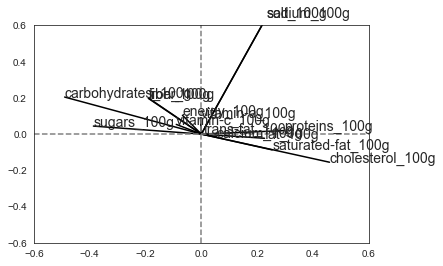

In [153]:
pcs = pca.components_

for i, (x, y) in enumerate(zip(pcs[1, :], pcs[2, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, DatafinalS.columns[i], fontsize='14')

# Afficher une ligne horizontale y=0
plt.plot([-0.6, 0.6], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.6, 0.6], color='grey', ls='--')

plt.xlim([-0.6, 0.6])
plt.ylim([-0.6, 0.6])

plt.savefig("graphique3.jpg")
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()

Text(0.5, 0.98, 'Premier plan factorie3')

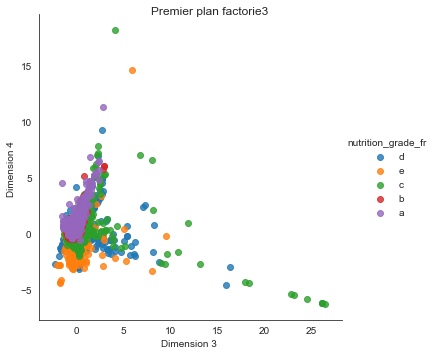

In [154]:
g_pca1 = seaborn.lmplot("Dim3", "Dim4", hue = "nutrition_grade_fr" , data = X_pca_df, fit_reg = False)
g_pca1.set(xlabel = "Dimension 3 ", ylabel = "Dimension 4 ")
g_pca1.fig.suptitle("Premier plan factorie3")

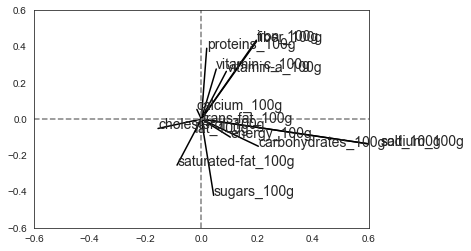

In [155]:
pcs = pca.components_

for i, (x, y) in enumerate(zip(pcs[2, :], pcs[3, :])):
    if corvar[i,i]
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, DatafinalS.columns[i], fontsize='14')

# Afficher une ligne horizontale y=0
plt.plot([-0.6, 0.6], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.6, 0.6], color='grey', ls='--')

plt.xlim([-0.6, 0.6])
plt.ylim([-0.6, 0.6])

plt.savefig("graphique3.jpg")
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()

Text(0.5, 0.98, 'Premier plan factorie4')

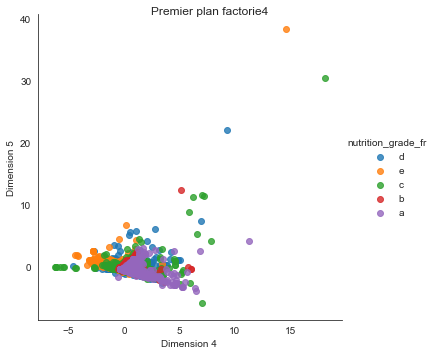

In [156]:
g_pca1 = seaborn.lmplot("Dim4", "Dim5", hue = "nutrition_grade_fr" , data = X_pca_df, fit_reg = False)
g_pca1.set(xlabel = "Dimension 4 ", ylabel = "Dimension 5 ")
g_pca1.fig.suptitle("Premier plan factorie4")

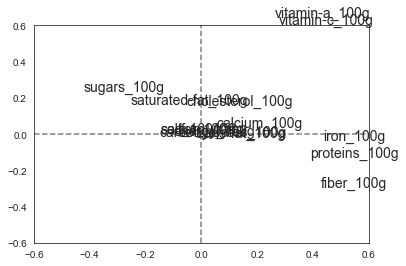

In [205]:
pcs = pca.components_

for i, (x, y) in enumerate(zip(pcs[3, :], pcs[4, :])):
    # Afficher un segment de l'origine au point (x, y)
     plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, DatafinalS.columns[i], fontsize='14')

# Afficher une ligne horizontale y=0
plt.plot([-0.6, 0.6], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.6, 0.6], color='grey', ls='--')

plt.xlim([-0.6, 0.6])
plt.ylim([-0.6, 0.6])

plt.savefig("graphique3.jpg")
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()

In [165]:
pcs

array([[ 5.54364826e-01,  4.77929013e-01,  4.10659596e-01,
         2.57794987e-02,  1.26598909e-01,  2.42223136e-01,
         1.77775234e-01,  2.19372704e-01,  2.71761485e-01,
        -1.05658319e-01, -1.05671750e-01, -6.51656570e-03,
        -3.09468065e-02,  1.24556771e-02,  2.07822148e-01],
       [-6.77963473e-02,  2.26508477e-01,  2.53836776e-01,
         8.25910543e-03,  4.59297059e-01, -4.89982274e-01,
        -3.86916657e-01, -1.88684028e-01,  2.96800183e-01,
         2.32192990e-01,  2.32223677e-01, -3.18540759e-03,
        -8.98777056e-02,  5.58559094e-02, -1.90036479e-01],
       [ 1.03755668e-01, -2.31992823e-02, -8.71646219e-02,
         3.81639353e-03, -1.55327216e-01,  2.04362071e-01,
         4.41456873e-02,  1.98008074e-01,  1.92461693e-02,
         6.41755998e-01,  6.41730295e-01,  8.95665341e-02,
         5.34330146e-02, -1.60639199e-02,  1.97138610e-01],
       [-9.94835638e-02, -7.16629970e-02, -2.54263477e-01,
        -2.01682970e-02, -5.18860697e-02, -1.49970342

In [147]:
"""cos2"""
coord = Z

In [ ]:

print(pca.n_components_) 

In [ ]:
print(pca.explained_variance_)

In [92]:
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

In [93]:
#corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
print(corvar)


[[ 9.31800138e-01 -1.00841103e-01  1.45997003e-01 -1.22748205e-01
  -4.87666796e-03  1.05167349e-02 -9.01129160e-03 -6.23294240e-02
   1.02594160e-02  1.50871480e-02 -2.32065091e-01  1.22828049e-01
  -5.81027237e-02  9.19077984e-02 -3.30905682e-07]
 [ 8.03323550e-01  3.36911433e-01 -3.26442474e-02 -8.84216844e-02
   8.16455644e-03  3.98282075e-02 -4.28808426e-02 -3.86606888e-01
   5.96630518e-02 -8.12873932e-02 -1.19161718e-01 -2.70532779e-02
  -2.21287324e-01 -7.24881012e-02  3.75454090e-07]
 [ 6.90254234e-01  3.77559874e-01 -1.22651358e-01 -3.13724040e-01
   1.78439084e-01 -2.61410987e-02 -2.49077487e-02 -1.55261939e-01
   2.55469505e-02 -9.62245034e-02  2.93801452e-01 -5.70140815e-02
   3.32859739e-01  1.91553349e-03 -3.66957201e-08]
 [ 4.33312854e-02  1.22846928e-02  5.37013572e-03 -2.48847365e-02
  -1.81319079e-02  8.73500692e-01  4.81210669e-01  2.90558586e-02
  -2.45178061e-02  1.56925902e-02  2.16306147e-02 -1.31324617e-02
   9.77152446e-03 -1.12771947e-04  6.52996040e-09]
 [ 2

In [96]:
#on affiche pour les deux premiers axes
print(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1],'COR_3':corvar[:,2],'COR_4':corvar[:,3],'COR_5':corvar[:,4]}))

                    id     COR_1     COR_2     COR_3     COR_4     COR_5
0          energy_100g  0.931800 -0.100841  0.145997 -0.122748 -0.004877
1             fat_100g  0.803324  0.336911 -0.032644 -0.088422  0.008165
2   saturated-fat_100g  0.690254  0.377560 -0.122651 -0.313724  0.178439
3       trans-fat_100g  0.043331  0.012285  0.005370 -0.024885 -0.018132
4     cholesterol_100g  0.212793  0.683164 -0.218565 -0.064020  0.170518
5   carbohydrates_100g  0.407139 -0.728806  0.287563 -0.185042 -0.010146
6          sugars_100g  0.298812 -0.575504  0.062118 -0.519435  0.258381
7           fiber_100g  0.368731 -0.280651  0.278622  0.528995 -0.311918
8        proteins_100g  0.456788  0.441464  0.027082  0.482206 -0.137611
9            salt_100g -0.177595  0.345367  0.903030 -0.180681  0.006614
10         sodium_100g -0.177618  0.345412  0.902994 -0.180742  0.006681
11      vitamin-a_100g -0.010953 -0.004738  0.126031  0.324990  0.694573
12      vitamin-c_100g -0.052017 -0.133685  0.07518

In [163]:
#cosinus carré des variables
cos2var = corvar**2
print(pd.DataFrame({'id':X.columns,'id':X.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1],'COR_3':corvar[:,2],'COR_4':corvar[:,3],'COR_5':corvar[:,4]}))

                    id     COR_1     COR_2     COR_3     COR_4     COR_5
0          energy_100g  0.931800 -0.100841  0.145997 -0.122748 -0.004877
1             fat_100g  0.803324  0.336911 -0.032644 -0.088422  0.008165
2   saturated-fat_100g  0.690254  0.377560 -0.122651 -0.313724  0.178439
3       trans-fat_100g  0.043331  0.012285  0.005370 -0.024885 -0.018132
4     cholesterol_100g  0.212793  0.683164 -0.218565 -0.064020  0.170518
5   carbohydrates_100g  0.407139 -0.728806  0.287563 -0.185042 -0.010146
6          sugars_100g  0.298812 -0.575504  0.062118 -0.519435  0.258381
7           fiber_100g  0.368731 -0.280651  0.278622  0.528995 -0.311918
8        proteins_100g  0.456788  0.441464  0.027082  0.482206 -0.137611
9            salt_100g -0.177595  0.345367  0.903030 -0.180681  0.006614
10         sodium_100g -0.177618  0.345412  0.902994 -0.180742  0.006681
11      vitamin-a_100g -0.010953 -0.004738  0.126031  0.324990  0.694573
12      vitamin-c_100g -0.052017 -0.133685  0.07518

In [164]:
corvar[0,0]

0.9318001382534897

In [106]:
#variables actives
for j in range(p):
    plt.annotate(X.columns[j],(corvar[j,2],corvar[j,3]))

0.6453287265342628

In [158]:
#contributions
ctrvar = cos2var
for k in range(p):
    ctrvar[:,k] = ctrvar[:,k]/eigval[k]
#on n'affiche que pour les 5 premiers axes
print(pd.DataFrame({'id':X.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1],'CTR_3':ctrvar[:,2],'CTR_4':ctrvar[:,3],'CTR_5':ctrvar[:,4]}))

                    id     CTR_1     CTR_2     CTR_3     CTR_4     CTR_5
0          energy_100g  0.038502  0.000939  0.002746  0.004270  0.000015
1             fat_100g  0.028617  0.010482  0.000137  0.002216  0.000043
2   saturated-fat_100g  0.021128  0.013164  0.001938  0.027894  0.020381
3       trans-fat_100g  0.000083  0.000014  0.000004  0.000176  0.000210
4     cholesterol_100g  0.002008  0.043099  0.006154  0.001162  0.018611
5   carbohydrates_100g  0.007351  0.049050  0.010653  0.009704  0.000066
6          sugars_100g  0.003959  0.030585  0.000497  0.076468  0.042733
7           fiber_100g  0.006029  0.007274  0.010001  0.079309  0.062276
8        proteins_100g  0.009253  0.017997  0.000094  0.065899  0.012121
9            salt_100g  0.001399  0.011015  0.105054  0.009252  0.000028
10         sodium_100g  0.001399  0.011018  0.105045  0.009258  0.000029
11      vitamin-a_100g  0.000005  0.000002  0.002046  0.029933  0.308798
12      vitamin-c_100g  0.000120  0.001650  0.00072

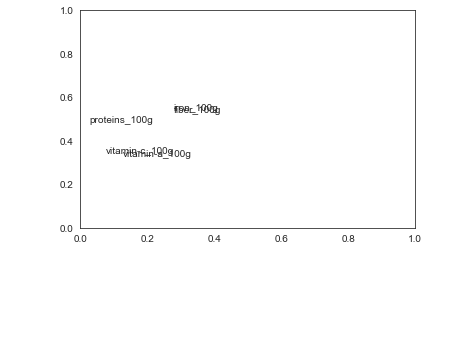

In [162]:
#variables actives
for j in range(p):
    plt.annotate(X.columns[j],(corvar[j,2],corvar[j,3]))

In [166]:
"""acp"""

'acp'

In [235]:
Datafinal2

,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition_grade_fr
26261,1628.0,6.94,1.39,0.0,0.000,63.89,0.00,11.1,16.67,0.00000,0.000,0.000000,0.0000,0.056,0.00500,a
115880,138.0,0.00,0.00,0.0,0.002,2.50,2.50,0.0,5.42,0.12700,0.050,0.000062,0.0000,0.167,0.00000,a
115882,669.0,2.00,1.00,0.0,0.020,17.00,14.00,3.0,20.00,0.15240,0.060,0.000030,0.0012,0.200,0.00000,a
115883,669.0,2.00,1.00,0.0,0.005,18.00,14.00,3.0,20.00,0.19050,0.075,0.000000,0.0060,0.150,0.00000,a
115884,669.0,2.00,1.00,0.0,0.020,17.00,14.00,3.0,20.00,0.15240,0.060,0.000030,0.0012,0.200,0.00000,a
115885,669.0,2.00,1.00,0.0,0.020,17.00,14.00,3.0,20.00,0.15240,0.060,0.000030,0.0012,0.200,0.00036,a
27374,1004.0,3.00,0.00,0.0,0.000,46.00,6.00,6.0,10.00,1.21920,0.480,0.000000,0.0000,0.080,0.00216,a
115888,1448.0,7.69,0.00,0.0,0.000,69.23,0.00,7.7,7.69,1.07442,0.423,0.000000,0.0000,0.000,0.00554,a
115894,297.0,0.00,0.00,0.0,0.000,17.86,10.71,3.6,3.57,0.00000,0.000,0.000107,0.0145,0.000,0.00000,a
115895,297.0,0.00,0.00,0.0,0.000,17.86,14.29,3.6,0.00,0.01778,0.007,0.000054,0.0257,0.000,0.00036,a


In [236]:
Datafinal_acp=Datafinal2.sample(n=5000)


AC=Datafinal_acp[Datafinal_acp.columns[:-1]]


#dimension
print(AC.shape) # (18, 6)
#nombre d'observations
n = AC.shape[0]
#nombre de variables
p = AC.shape[1]
#affichage des données
print(AC)

(5000, 15)
        energy_100g  fat_100g  saturated-fat_100g  trans-fat_100g  \
95570        2243.0     32.14                7.14             0.0   
38745         138.0      0.00                0.00             0.0   
123449        858.0     16.07                8.93             0.0   
107193        297.0      2.08                1.25             0.0   
53286        1431.0      1.32                0.00             0.0   
87361         975.0     23.33                0.00             0.0   
61911         753.0      1.00                0.00             0.0   
124194        146.0      1.33                0.00             0.0   
124963        238.0      0.00                0.00             0.0   
3500         1594.0      0.00                0.00             0.0   
38333        2092.0     21.43                1.79             0.0   
56354         356.0      0.00                0.00             0.0   
105986       1795.0     21.43                8.93             0.0   
96911        1402.0    

In [237]:
#scikit-learn
import sklearn
#vérification de la version
print(sklearn.__version__) # 0.19.1

0.20.2


In [238]:
#classe pour standardisation
from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
PC = sc.fit_transform(AC)
print(PC)

[[ 1.37889912  1.20010037  0.389614   ...  0.51476121 -0.49343441
  -0.13627802]
 [-1.43211151 -0.84706042 -0.69355844 ... -0.19374481 -0.49343441
  -0.55038316]
 [-0.47062569  0.17651998  0.66116563 ... -0.15732628 -0.39691479
  -0.34493565]
 ...
 [ 0.14899851 -0.67954229 -0.69355844 ... -0.19374481 -0.49343441
   0.36129017]
 [-1.16903831 -0.73304618 -0.69355844 ... -0.19374481 -0.49343441
  -0.55038316]
 [-0.2863409  -0.28399566 -0.22934168 ...  0.00821251  0.05351009
   0.04027843]]


In [239]:


#vérification - librairie numpy
import numpy
#moyenne
print(np.mean(PC,axis=0))

[-1.20792265e-17 -5.75539616e-17 -6.53699317e-17  1.70530257e-17
 -2.84217094e-18 -7.49622586e-17  7.60280727e-17 -8.52651283e-18
 -1.13686838e-17  1.98951966e-17  2.84217094e-18  5.68434189e-17
  2.91322522e-17  1.42108547e-18  4.54747351e-17]


In [240]:
#écart-type
print(numpy.std(PC,axis=0,ddof=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [241]:
#classe pour l'ACP
from sklearn.decomposition import PCA
#instanciation
acp = PCA(svd_solver='full')

In [242]:
#affichage des paramètres
print(acp)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)


In [243]:
#calculs
coord = acp.fit_transform(PC)
#nombre de composantes calculées
print(acp.n_components_) # 

15


In [244]:
print(acp.explained_variance_)

[2.97644960e+00 2.43152921e+00 2.00707695e+00 1.56253639e+00
 1.20074174e+00 1.01860223e+00 9.14586509e-01 7.25791923e-01
 6.45452019e-01 5.69549070e-01 4.07752420e-01 2.98023770e-01
 2.36461500e-01 8.40309597e-03 4.41683981e-05]


In [245]:
print(acp.singular_values_**2/n)

[2.97585431e+00 2.43104290e+00 2.00667554e+00 1.56222388e+00
 1.20050160e+00 1.01839851e+00 9.14403591e-01 7.25646765e-01
 6.45322929e-01 5.69435160e-01 4.07670869e-01 2.97964165e-01
 2.36414207e-01 8.40141535e-03 4.41595644e-05]


In [246]:
print(acp.explained_variance_ratio_*100)

[1.98390287e+01 1.62069527e+01 1.33778369e+01 1.04148259e+01
 8.00334397e+00 6.78932341e+00 6.09602394e+00 4.83764510e+00
 4.30215286e+00 3.79623440e+00 2.71780580e+00 1.98642777e+00
 1.57609472e+00 5.60094357e-02 2.94397096e-04]


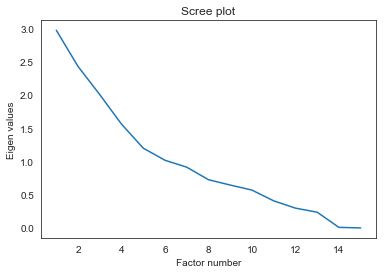

In [247]:
#scree plot
plt.plot(numpy.arange(1,p+1),acp.explained_variance_) 
plt.title("Scree plot") 
plt.ylabel("Eigen values") 
plt.xlabel("Factor number")
plt.show()

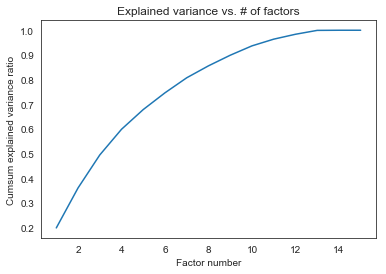

In [248]:
#cumul de variance expliquée
plt.plot(numpy.arange(1,p+1),numpy.cumsum(acp.explained_variance_ratio_)) 
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

In [249]:
#seuils pour test des bâtons brisés
bs = 1/numpy.arange(p,0,-1)
bs = numpy.cumsum(bs)
bs = bs[::-1]

In [250]:
#test des bâtons brisés
print(pd.DataFrame({'Val.Propre':acp.explained_variance_,'Seuils':bs}))

    Val.Propre    Seuils
0     2.976450  3.318229
1     2.431529  2.318229
2     2.007077  1.818229
3     1.562536  1.484896
4     1.200742  1.234896
5     1.018602  1.034896
6     0.914587  0.868229
7     0.725792  0.725372
8     0.645452  0.600372
9     0.569549  0.489261
10    0.407752  0.389261
11    0.298024  0.298352
12    0.236461  0.215018
13    0.008403  0.138095
14    0.000044  0.066667


In [251]:
#le champ components_ de l'objet ACP
print(acp.components_)

[[ 4.92069362e-01  4.83210597e-01  4.43117331e-01  4.15848141e-02
   2.18024596e-01  1.02038249e-01  6.83434622e-02  1.97265892e-01
   3.46671162e-01 -2.08394313e-02 -2.08996393e-02 -2.62750824e-03
  -5.85326176e-02  2.71704119e-01  1.62646042e-01]
 [-2.55170007e-01  2.18650356e-02  8.98801215e-02 -4.56394709e-02
   3.77657912e-01 -5.20621064e-01 -4.20765974e-01 -2.11194670e-01
   2.44934678e-01  2.39600889e-01  2.39709561e-01  7.59153141e-02
  -2.58972202e-02  2.68010853e-01 -1.89219268e-01]
 [ 9.41679940e-02 -3.62568726e-02 -1.05508437e-01  1.53857776e-02
  -1.63949231e-01  1.98010906e-01  4.17637480e-02  1.83994853e-01
   1.30407113e-02  6.23176171e-01  6.23096451e-01  1.83634045e-01
   1.14933137e-01 -5.19591958e-02  2.24420266e-01]
 [-1.08773702e-01 -1.11318393e-01 -2.59422317e-01 -8.49351684e-02
  -1.22636884e-01 -9.44274721e-02 -3.35482320e-01  4.45148110e-01
   2.88092693e-01 -2.18660168e-01 -2.18773040e-01  3.30451682e-01
   2.96370758e-01  1.45328381e-01  4.12038111e-01]
 [-1

In [252]:
 #racine carrée des valeurs propres
sqrt_propre = np.sqrt(acp.explained_variance_)

In [253]:
#corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):
    corvar[:,k] = acp.components_[k,:] * sqrt_propre[k]
#afficher la matrice des corrélations variables x facteurs
print(corvar)

[[ 8.48937253e-01 -3.97895815e-01  1.33409062e-01 -1.35968711e-01
  -1.65504875e-02  2.88169341e-02 -1.24197398e-01  1.16223421e-02
  -4.82305122e-02  7.22652922e-02 -2.00555658e-01 -1.15204450e-01
  -5.58344980e-02  6.38282250e-02 -2.25290002e-06]
 [ 8.33653767e-01  3.40949403e-02 -5.13655986e-02 -1.39149612e-01
  -3.86566322e-02  2.30790375e-01 -3.96361711e-01 -9.97512870e-02
  -1.82799263e-02 -6.44051525e-02 -9.70130814e-02  2.66258575e-02
  -2.07709304e-01 -5.00066700e-02  2.04785628e-06]
 [ 7.64483300e-01  1.40153322e-01 -1.49475221e-01 -3.24281672e-01
   2.17591892e-01  5.01757870e-02 -1.35578745e-01 -1.08133161e-01
   3.30655514e-02 -1.51687077e-01  2.33541207e-01  5.05895034e-02
   3.27840160e-01  6.66248867e-04  3.32073430e-07]
 [ 7.17437430e-02 -7.11672765e-02  2.17972378e-02 -1.06170197e-01
   2.82339193e-02  8.54712999e-01  4.93821288e-01  5.48754461e-02
   3.51869402e-03  2.49074931e-04 -3.27045219e-03  3.91644588e-03
   3.76220579e-04 -2.38798801e-05  2.30157152e-08]
 [ 3

In [254]:
#on affiche pour les deux 5 axes
print(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1],'COR_3':corvar[:,2],'COR_4':corvar[:,3],'COR_5':corvar[:,4]}))

                    id     COR_1     COR_2     COR_3     COR_4     COR_5
0          energy_100g  0.848937 -0.397896  0.133409 -0.135969 -0.016550
1             fat_100g  0.833654  0.034095 -0.051366 -0.139150 -0.038657
2   saturated-fat_100g  0.764483  0.140153 -0.149475 -0.324282  0.217592
3       trans-fat_100g  0.071744 -0.071167  0.021797 -0.106170  0.028234
4     cholesterol_100g  0.376145  0.588896 -0.232269 -0.153298  0.176026
5   carbohydrates_100g  0.176040 -0.811823  0.280525 -0.118036  0.065593
6          sugars_100g  0.117909 -0.656116  0.059167 -0.419358  0.348900
7           fiber_100g  0.340331 -0.329323  0.260668  0.556442 -0.315756
8        proteins_100g  0.598091  0.381935  0.018475  0.360120 -0.205404
9            salt_100g -0.035953  0.373618  0.882862 -0.273328 -0.053963
10         sodium_100g -0.036057  0.373788  0.882749 -0.273469 -0.053911
11      vitamin-a_100g -0.004533  0.118377  0.260157  0.413069  0.623220
12      vitamin-c_100g -0.100983 -0.040382  0.16282

In [255]:
#cosinus carré des variables
cos2var = corvar**2 
cos2_df=pd.DataFrame({'id':X.columns,'COS2_12':cos2var[:,0] + cos2var[:,1],'COS2_23':cos2var[:,1]+cos2var[:,2],'COS2_34':cos2var[:,2]+cos2var[:,3],'COS2_45':cos2var[:,3]+cos2var[:,4]})

In [256]:
print(cos2_df)

                    id   COS2_12   COS2_23   COS2_34   COS2_45
0          energy_100g  0.879016  0.176119  0.036285  0.018761
1             fat_100g  0.696141  0.003801  0.022001  0.020857
2   saturated-fat_100g  0.604078  0.041986  0.127501  0.152505
3       trans-fat_100g  0.010212  0.005540  0.011747  0.012069
4     cholesterol_100g  0.488283  0.400747  0.077449  0.054486
5   carbohydrates_100g  0.690047  0.737751  0.092627  0.018235
6          sugars_100g  0.444390  0.433988  0.179362  0.297592
7           fiber_100g  0.224279  0.176402  0.377575  0.409329
8        proteins_100g  0.503587  0.146216  0.130028  0.171877
9            salt_100g  0.140883  0.919036  0.854154  0.077620
10         sodium_100g  0.141017  0.918963  0.854032  0.077692
11      vitamin-a_100g  0.014034  0.081695  0.238308  0.559029
12      vitamin-c_100g  0.011828  0.028143  0.163759  0.547256
13        calcium_100g  0.394387  0.180075  0.038420  0.066725
14           iron_100g  0.165797  0.188144  0.366366  0

In [268]:
X_ACP = acp.transform(PC)
# Transformation en DataFrame pandas
X_ACP_df1 = pd.DataFrame({
    "Dim1" : X_ACP[:,0], 
    "Dim2" : X_ACP[:,1], 
    "Dim3" : X_ACP[:,2], 
    "Dim4" : X_ACP[:,3],
    "Dim5" : X_ACP[:,4],
    "nutrition_grade_fr" : Datafinal_acp["nutrition_grade_fr"]
})

# Résultat (premières lignes)
X_ACP_df1.head()



,Dim1,Dim2,Dim3,Dim4,Dim5,nutrition_grade_fr
95570,1.028008,-0.927491,0.547767,-0.464875,-0.040325,d
38745,-2.319576,0.425776,-0.878698,-0.174215,-0.200520,b
123449,-0.035201,1.700852,-0.752997,-0.436601,0.060123,d
107193,-1.726649,0.597971,-0.788700,0.064764,-0.029338,b
53286,-0.521287,-0.744176,1.483376,0.647667,-0.253806,d


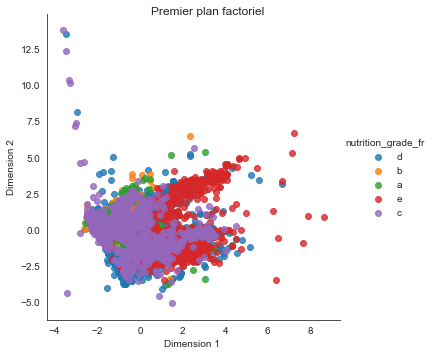

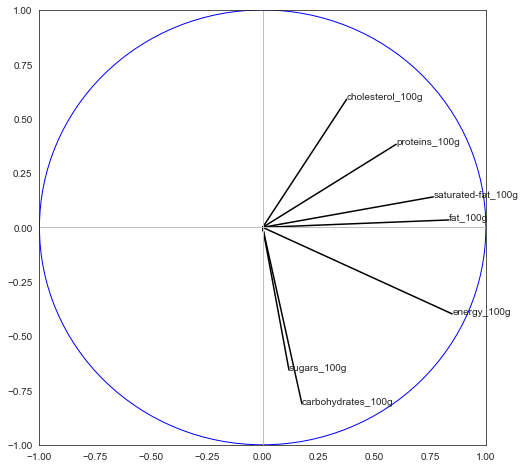

In [291]:
g_ACP = seaborn.lmplot("Dim1", "Dim2", hue = "nutrition_grade_fr" , data = X_ACP_df1, fit_reg = False)
g_ACP.set(xlabel = "Dimension 1 ", ylabel = "Dimension 2")
g_ACP.fig.suptitle("Premier plan factoriel")

plt.savefig("premier nuage points.jpg")
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des étiquettes (noms des variables)
for j in range(p):
    if (corvar[j,0]**2+ corvar[j,1]**2)>=0.4:
        plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))
        # Afficher un segment de l'origine au point (x, y)
        plt.plot([0, corvar[j,0]], [0, corvar[j,1]], color='k')
#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1) 
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False) 
axes.add_artist(cercle)
#affichage
plt.savefig("Premier plan factoriel.jpg")

plt.show()

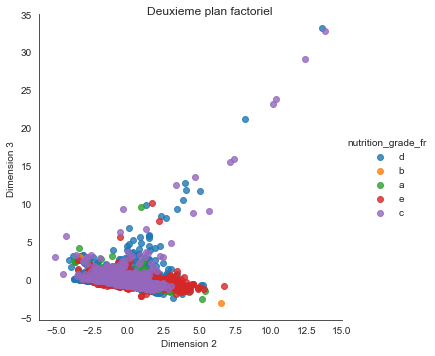

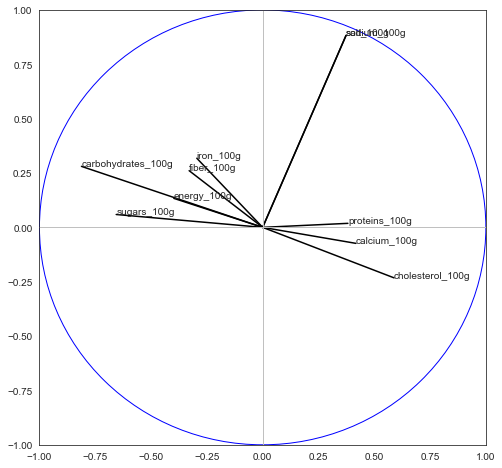

In [285]:
g_ACP = seaborn.lmplot("Dim2", "Dim3", hue = "nutrition_grade_fr" , data = X_ACP_df1, fit_reg = False)
g_ACP.set(xlabel = "Dimension 2 ", ylabel = "Dimension 3 ")
g_ACP.fig.suptitle("Deuxieme plan factoriel")
plt.savefig("Deuxieme nuage points.jpg")

#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des étiquettes (noms des variables)
for j in range(p):
    if (corvar[j,1]**2+ corvar[j,2]**2)>=0.1:
        plt.annotate(X.columns[j],(corvar[j,1],corvar[j,2]))
        # Afficher un segment de l'origine au point (x, y)
        plt.plot([0, corvar[j,1]], [0, corvar[j,2]], color='k')
#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1) 
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False) 
axes.add_artist(cercle)
#affichage
plt.savefig("Deuxieme plan factoriel.jpg")
plt.show()


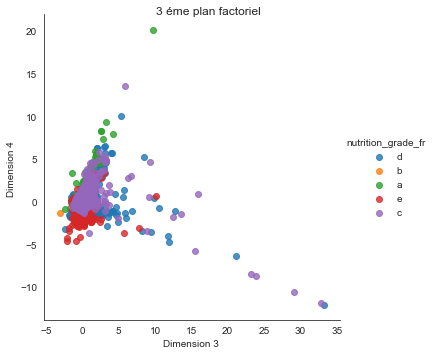

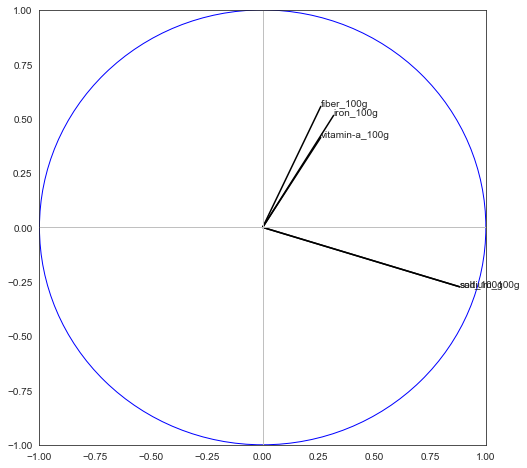

In [288]:
g_ACP = seaborn.lmplot("Dim3", "Dim4", hue = "nutrition_grade_fr" , data = X_ACP_df1, fit_reg = False)
g_ACP.set(xlabel = "Dimension 3 ", ylabel = "Dimension 4 ")
g_ACP.fig.suptitle("3 éme plan factoriel")
plt.savefig("3 nuages points.jpg")

#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des étiquettes (noms des variables)
for j in range(p):
    if (corvar[j,2]**2+ corvar[j,3]**2)>=0.2:
        plt.annotate(X.columns[j],(corvar[j,2],corvar[j,3]))
        # Afficher un segment de l'origine au point (x, y)
        plt.plot([0, corvar[j,2]], [0, corvar[j,3]], color='k')
#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1) 
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False) 
axes.add_artist(cercle)
#affichage
plt.savefig("3 plan factoriel.jpg")
plt.show()

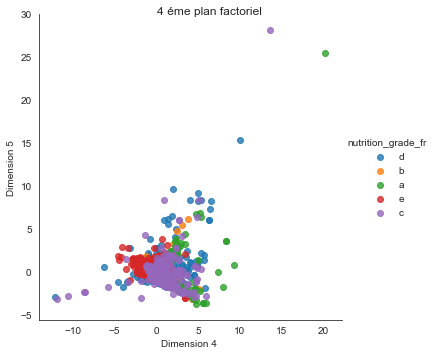

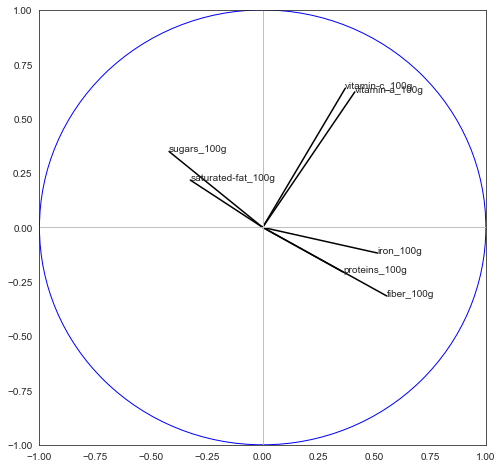

In [289]:
g_ACP = seaborn.lmplot("Dim4", "Dim5", hue = "nutrition_grade_fr" , data = X_ACP_df1, fit_reg = False)
g_ACP.set(xlabel = "Dimension 4 ", ylabel = "Dimension 5 ")
g_ACP.fig.suptitle("4 éme plan factoriel")
plt.savefig("4 nuage points.jpg")

#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des étiquettes (noms des variables)
for j in range(p):
    if (corvar[j,3]**2+ corvar[j,4]**2)>=0.1:
        plt.annotate(X.columns[j],(corvar[j,3],corvar[j,4]))
        # Afficher un segment de l'origine au point (x, y)
        plt.plot([0, corvar[j,3]], [0, corvar[j,4]], color='k')
#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1) 
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False) 
axes.add_artist(cercle)
plt.savefig("4 plan factoriel.jpg")
#affichage
plt.show()